### 사전준비

In [1]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [3]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

#### MNIST 다운로드

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import (Dense, BatchNormalization, Dropout)
from keras.datasets.mnist import load_data

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [7]:
print((train_images.shape, train_labels.shape))

((60000, 28, 28), (60000,))


In [8]:
print((test_images.shape, test_labels.shape))

((10000, 28, 28), (10000,))


In [11]:
def show_images(dataset, label, nrow, ncol):

    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol,2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):

        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    # 빈 칸 없이 꽉 채우기
    plt.tight_layout()
    plt.show()

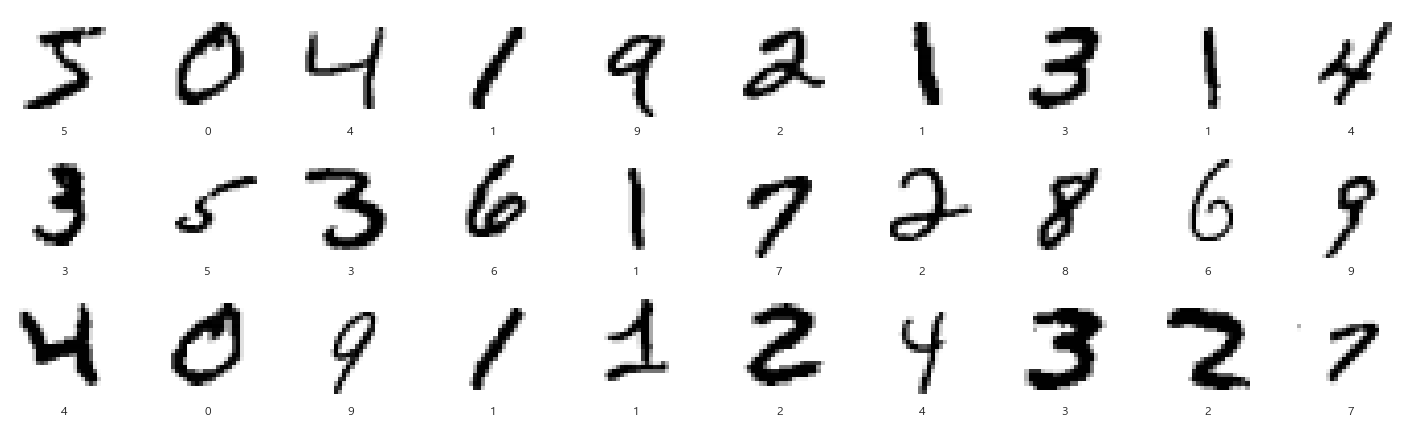

In [12]:
show_images(train_images, train_labels, 3, 10)

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),
                 epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 4s 6ms/step - loss: 4.1364 - accuracy: 0.9159 - val_loss: 0.5853 - val_accuracy: 0.9519
Epoch 2/20
600/600 [==============================] - 3s 6ms/step - loss: 0.3844 - accuracy: 0.9585 - val_loss: 0.3879 - val_accuracy: 0.9592
Epoch 3/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2207 - accuracy: 0.9691 - val_loss: 0.4797 - val_accuracy: 0.9517
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2471 - accuracy: 0.9683 - val_loss: 0.3767 - val_accuracy: 0.9627
Epoch 5/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2056 - accuracy: 0.9705 - val_loss: 0.5709 - val_accuracy: 0.9469
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.2442 - accuracy: 0.9689 - val_loss: 0.3953 - val_accuracy: 0.9594
Epoch 7/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2056 - accuracy: 0.9716 - val_loss: 0.3911 - val_accuracy: 0.9602
Epoch 

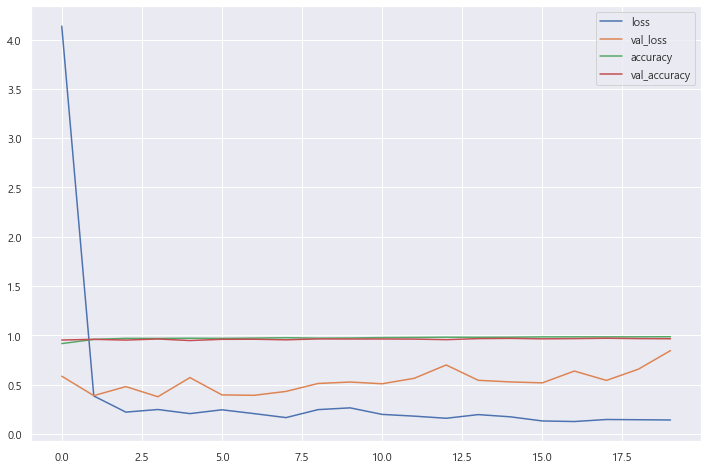

In [30]:
# Accuracy / Lossfunction 값
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.show()

In [31]:
score = model.evaluate(test_images, test_labels)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.8450 - accuracy: 0.9652
Test loss :  0.8449567556381226
Test Accuracy :  0.9652000069618225


In [32]:
import numpy as np

predicted_result = model.predict(test_images)
predicted_labels = np.argmax(predicted_result, axis = 1)
predicted_labels[:10], test_labels[:10]

313/313 [==============================] - 1s 2ms/step


(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [33]:
wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)
len(wrong_result)

348

In [34]:
import random

samples = random.choices(population= wrong_result, k = 16)
samples

[2109,
 9679,
 810,
 7928,
 3520,
 8527,
 844,
 2334,
 1494,
 4504,
 4360,
 3629,
 8416,
 4500,
 1522,
 3172]

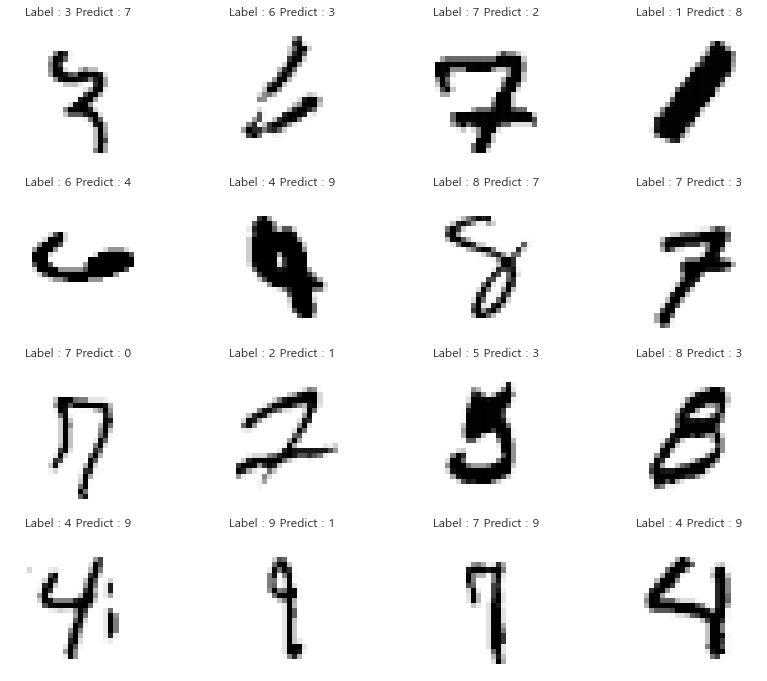

In [35]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(test_images[n].reshape(28, 28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label : ' + str(test_labels[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()